--- EDA for SPY ---


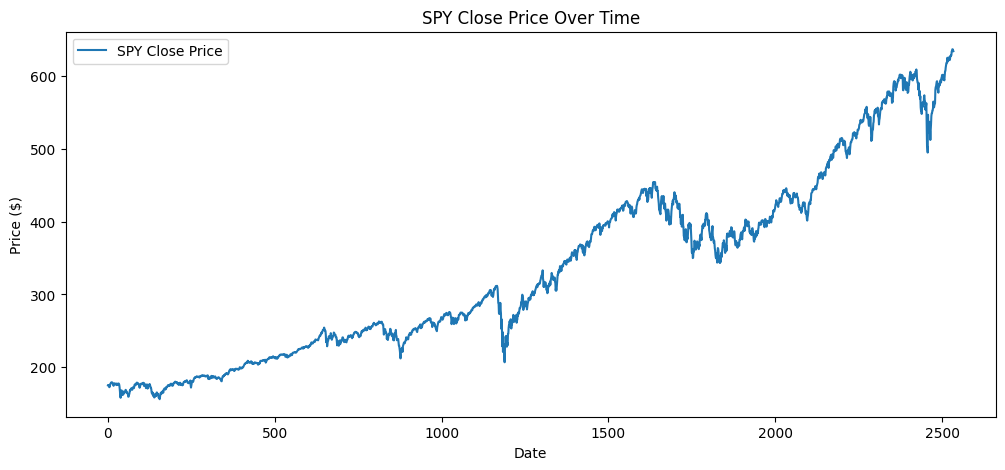

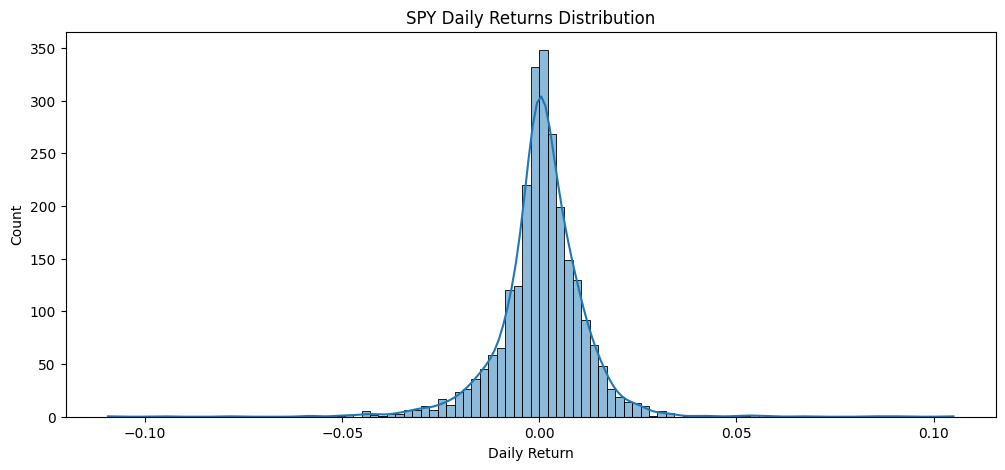

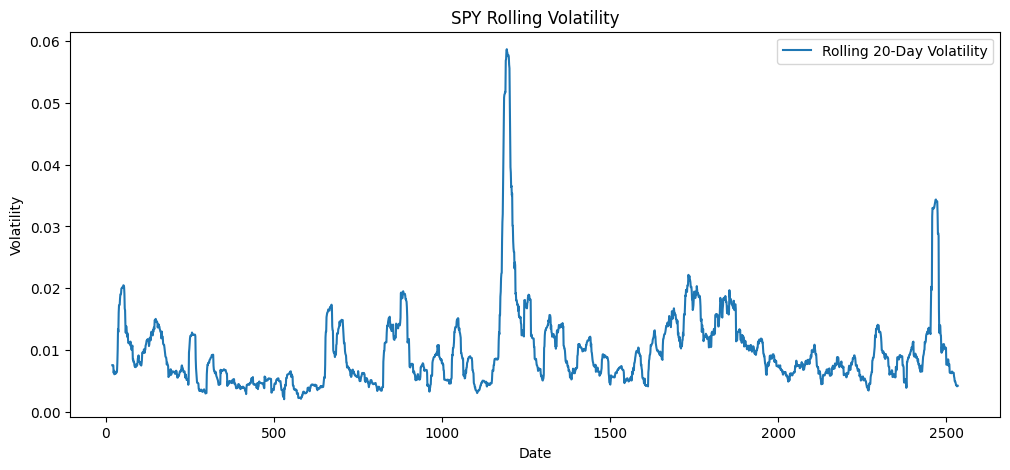

Number of outliers detected for SPY: 33
          Close  Daily Return
37   159.743591     -0.042107
39   163.924728      0.038394
248  175.040741     -0.035909
654  234.272552     -0.041823
657  228.680496     -0.037509
--- EDA for TSLA ---


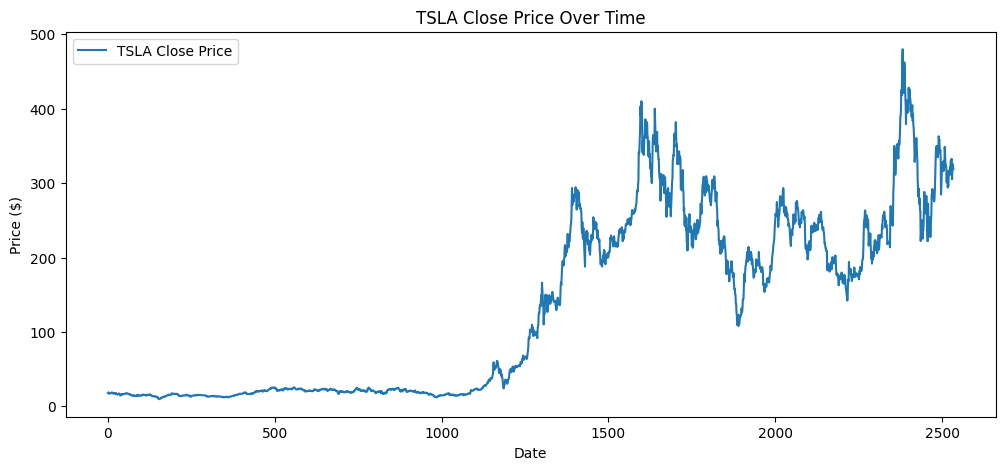

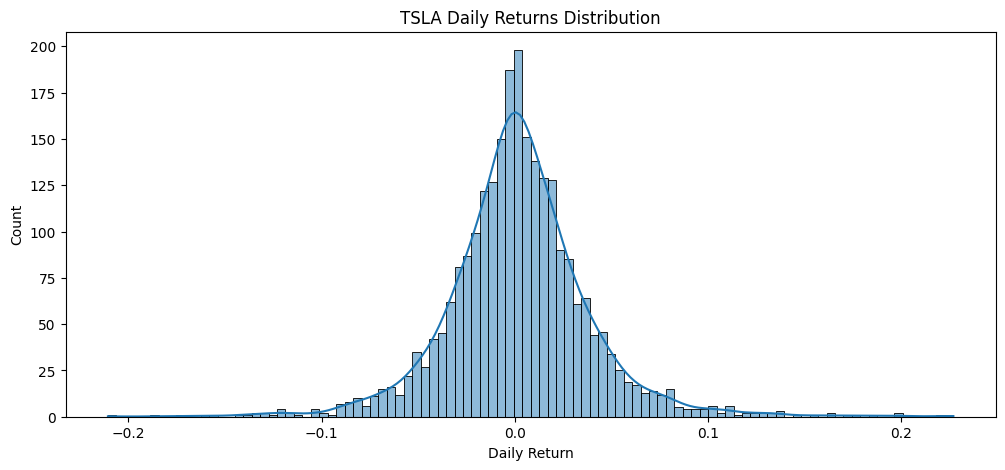

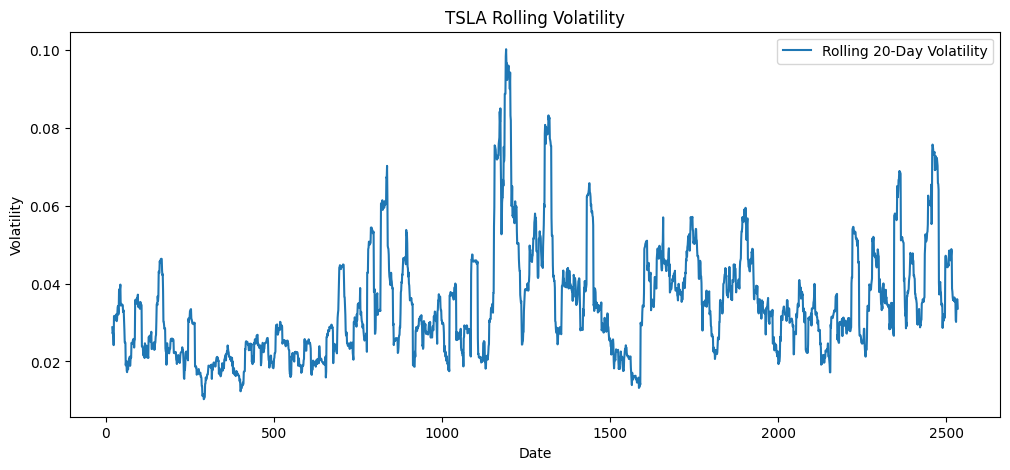

Number of outliers detected for TSLA: 43
         Close  Daily Return
778  23.302668      0.161880
818  17.651333     -0.139015
819  20.713333      0.173471
835  19.609333      0.127189
894  20.150667     -0.129711


{'SPY':             Date       Close        High         Low        Open     Volume  \
 0     2015-07-01  174.917114  175.363889  174.124717  175.110995  135979900   
 1     2015-07-02  174.756927  175.566188  174.335441  175.397596  104373700   
 2     2015-07-06  174.259628  175.043588  173.256487  173.458805  117975400   
 3     2015-07-07  175.355438  175.481879  172.059407  174.461888  173820200   
 4     2015-07-08  172.413498  174.293327  172.177466  174.006719  164020100   
 ...          ...         ...         ...         ...         ...        ...   
 2530  2025-07-24  634.419983  636.150024  633.989990  634.599976   71307100   
 2531  2025-07-25  637.099976  637.580017  634.840027  635.090027   56865400   
 2532  2025-07-28  636.940002  638.039978  635.539978  637.479980   54917100   
 2533  2025-07-29  635.260010  638.669983  634.340027  638.349976   60556300   
 2534  2025-07-30  634.460022  637.679993  631.539978  635.919983   80418900   
 
       Daily Return  Rolling St

In [10]:
def eda_feature_engineering(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    for ticker, df in data.items():
        print(f"--- EDA for {ticker} ---")
        
        # Plot Close prices
        plt.figure(figsize=(12,5))
        plt.plot(df.index, df['Close'], label=f'{ticker} Close Price')
        plt.title(f'{ticker} Close Price Over Time')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.legend()
        plt.show()
        
        # Compute daily returns
        df['Daily Return'] = df['Close'].pct_change()
        
        # Plot daily returns distribution
        plt.figure(figsize=(12,5))
        sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
        plt.title(f'{ticker} Daily Returns Distribution')
        plt.show()
        
        # Rolling 20-day volatility
        df['Rolling Std'] = df['Daily Return'].rolling(window=20).std()
        
        plt.figure(figsize=(12,5))
        plt.plot(df.index, df['Rolling Std'], label='Rolling 20-Day Volatility')
        plt.title(f'{ticker} Rolling Volatility')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.legend()
        plt.show()
        
        # Outlier detection: returns beyond ±3 std dev
        threshold = 3 * df['Daily Return'].std()
        outliers = df[ (df['Daily Return'].abs() > threshold) ]
        print(f"Number of outliers detected for {ticker}: {len(outliers)}")
        if not outliers.empty:
            print(outliers[['Close', 'Daily Return']].head())
    
    return data

# Run on your data dict
data = {
    'SPY': df_spy,
    'TSLA': df_tsla
}
eda_feature_engineering(data)


In [8]:
file_path=r"C:\Users\HP\Desktop\Tenx\week11\src\processed_data\SPY_processed.csv"
df_spy=pd.read_csv(file_path)
file_path=r"C:\Users\HP\Desktop\Tenx\week11\src\processed_data\TSLA_processed.csv"
df_tsla=pd.read_csv(file_path)
data = {
    'SPY': df_spy,    # DataFrame for SPY
    'TSLA': df_tsla   # DataFrame for TSLA
}


In [9]:
print(df_spy.columns)
print(df_tsla.columns)


Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
